In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score 

from sklearn.model_selection import KFold

In [2]:
titanic_df = pd.read_csv('C:/Users/user/Desktop/프로젝트 data/최적입지_변수_총합(용산적용전).csv', encoding='euckr')
titanic_df.head(2)

,id,버정평균점수,지하철평균점수,택정평균점수,공원평균점수,대학평균점수,고등학교평균점수,문화평균점수,따릉이평균점수,인구수점수,class
0,28208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,28207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15677 entries, 0 to 15676
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        15677 non-null  int64  
 1   버정평균점수    15677 non-null  float64
 2   지하철평균점수   15677 non-null  float64
 3   택정평균점수    15677 non-null  float64
 4   공원평균점수    15677 non-null  float64
 5   대학평균점수    15677 non-null  float64
 6   고등학교평균점수  15677 non-null  float64
 7   문화평균점수    15677 non-null  float64
 8   따릉이평균점수   15677 non-null  float64
 9   인구수점수     15677 non-null  float64
 10  class     15677 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.3 MB


In [4]:
# train_test data split
data = ['버정평균점수', '지하철평균점수', '택정평균점수', '공원평균점수', 
        '대학평균점수', '고등학교평균점수', '문화평균점수', '따릉이평균점수', '인구수점수']
X_train, X_test, y_train, y_test = train_test_split(
    titanic_df[data], # 문제
    titanic_df['class'], # 정답
    test_size = 0.2, # test-size비율
    random_state = 200 # 시드값 설정
)

In [5]:
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
svc_clf = SVC()
clf_list = [df_clf, rf_clf, svc_clf]

In [6]:
def exec_kfold(df, clf, k):
    acc_list = []
    kfold = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kfold.split(df[data])):
        X_train2,X_test2 = df[data].values[train_index], df[data].values[test_index]
        y_train2,y_test2 = df['class'].values[train_index],df['class'].values[test_index]
        
        clf.fit(X_train2, y_train2)
        pred2 = clf.predict(X_test2)
        acc = accuracy_score(y_test2, pred2)
        acc_list.append(acc)
        print(i , ': 교차검증 정확도>> {0:.2f}'.format(acc))
    print('평균 정확도>> {0:.2f}'.format(np.mean(acc_list)))
    return np.mean(acc_list)

In [7]:
acc_total = []
model_list = ['decision tree', 'random forest', 'svm']
for i, clf in enumerate(clf_list):
    print(model_list[i], '----검증시작----')
    acc_result = exec_kfold(titanic_df, clf, 10)
    acc_total.append(acc_result)

decision tree ----검증시작----
0 : 교차검증 정확도>> 0.87
1 : 교차검증 정확도>> 0.92
2 : 교차검증 정확도>> 0.88
3 : 교차검증 정확도>> 0.88
4 : 교차검증 정확도>> 0.91
5 : 교차검증 정확도>> 0.92
6 : 교차검증 정확도>> 0.89
7 : 교차검증 정확도>> 0.87
8 : 교차검증 정확도>> 0.89
9 : 교차검증 정확도>> 0.93
평균 정확도>> 0.90
random forest ----검증시작----
0 : 교차검증 정확도>> 0.90
1 : 교차검증 정확도>> 0.93
2 : 교차검증 정확도>> 0.91
3 : 교차검증 정확도>> 0.92
4 : 교차검증 정확도>> 0.95
5 : 교차검증 정확도>> 0.95
6 : 교차검증 정확도>> 0.92
7 : 교차검증 정확도>> 0.90
8 : 교차검증 정확도>> 0.92
9 : 교차검증 정확도>> 0.96
평균 정확도>> 0.93
svm ----검증시작----
0 : 교차검증 정확도>> 0.91
1 : 교차검증 정확도>> 0.95
2 : 교차검증 정확도>> 0.93
3 : 교차검증 정확도>> 0.93
4 : 교차검증 정확도>> 0.96
5 : 교차검증 정확도>> 0.96
6 : 교차검증 정확도>> 0.93
7 : 교차검증 정확도>> 0.90
8 : 교차검증 정확도>> 0.93
9 : 교차검증 정확도>> 0.96
평균 정확도>> 0.94


In [8]:
for i in range(3):
    print(model_list[i], " 교차검증 평균: ", acc_total[i])

decision tree  교차검증 평균:  0.8966001995884506
random forest  교차검증 평균:  0.9267714288970217
svm  교차검증 평균:  0.9364667309169998


In [9]:
# 최대 평균값 ==
max_value = np.max(acc_total)
# 최대 평균값 인덱스 ==
max_index = np.argmax(acc_total)
# 최대 평균값 모델명 ==
max_model = model_list[max_index]

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model)

최고 교차 검증 평균>>  0.9364667309169998
최고 교차 검증 인덱스>>  2
최고 교차 검증 모델링>>  svm


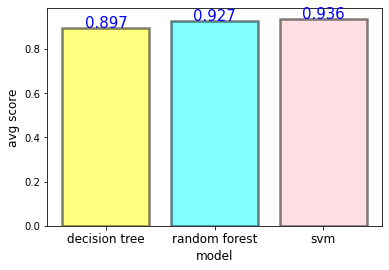

In [69]:
plt.bar(np.arange(len(acc_total)), 
        acc_total,color = ['yellow', 'cyan', 'pink'], alpha = 0.5,
        edgecolor = 'black', linewidth = 2.5)
plt.xticks(np.arange(len(acc_total)), model_list, fontsize=12)
plt.xlabel('model', fontsize=12)
plt.ylabel('avg score', fontsize=12)
add_value_label(model_list, np.round(acc_total, 3))
plt.show()

In [48]:
acc_total

[0.8966001995884506, 0.9267714288970217, 0.9364667309169998]

In [65]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], 
                 fontsize=15,
                 color="blue",
                 ha="center")

In [83]:
from sklearn.metrics import f1_score

# 3000개 추가

In [72]:
titanic_df = pd.read_csv('C:/Users/user/Desktop/프로젝트 data/최적입지_변수_총합(용산적용전)3.csv', encoding='euckr')
titanic_df.head(2)

,id,bus,metro,taxi,uni,high,park,cf,bike,pop,class
0,27900,0.75,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1
1,27896,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1


In [73]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15677 entries, 0 to 15676
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15677 non-null  int64  
 1   bus     15677 non-null  float64
 2   metro   15677 non-null  float64
 3   taxi    15677 non-null  float64
 4   uni     15677 non-null  float64
 5   high    15677 non-null  float64
 6   park    15677 non-null  float64
 7   cf      15677 non-null  float64
 8   bike    15677 non-null  float64
 9   pop     15677 non-null  float64
 10  class   15677 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.3 MB


In [75]:
# train_test data split
data = ['bus', 'metro', 'taxi', 'uni', 
        'high', 'park', 'cf', 'bike', 'pop']
X_train, X_test, y_train, y_test = train_test_split(
    titanic_df[data], # 문제
    titanic_df['class'], # 정답
    test_size = 0.2, # test-size비율
    random_state = 200 # 시드값 설정
)

In [76]:
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
svc_clf = SVC()
clf_list = [df_clf, rf_clf, svc_clf]

In [86]:
def exec_kfold(df, clf, k):
    acc_list = []
    kfold = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kfold.split(df[data])):
        X_train2,X_test2 = df[data].values[train_index], df[data].values[test_index]
        y_train2,y_test2 = df['class'].values[train_index],df['class'].values[test_index]
        
        clf.fit(X_train2, y_train2)
        pred2 = clf.predict(X_test2)
        acc = accuracy_score(y_test2, pred2)
        acc_list.append(acc)
        print(i , ': 교차검증 정확도>> {0:.2f}'.format(acc))
    print('평균 정확도>> {0:.2f}'.format(np.mean(acc_list)))
    return np.mean(acc_list)

In [87]:
acc_total = []
model_list = ['decision tree', 'random forest', 'svm']
for i, clf in enumerate(clf_list):
    print(model_list[i], '----검증시작----')
    acc_result = exec_kfold(titanic_df, clf, 10)
    acc_total.append(acc_result)

decision tree ----검증시작----
0 : 교차검증 정확도>> 0.53
1 : 교차검증 정확도>> 0.80
2 : 교차검증 정확도>> 0.77
3 : 교차검증 정확도>> 0.74
4 : 교차검증 정확도>> 0.75
5 : 교차검증 정확도>> 0.85
6 : 교차검증 정확도>> 0.81
7 : 교차검증 정확도>> 0.75
8 : 교차검증 정확도>> 0.72
9 : 교차검증 정확도>> 0.85
평균 정확도>> 0.76
random forest ----검증시작----
0 : 교차검증 정확도>> 0.50
1 : 교차검증 정확도>> 0.83
2 : 교차검증 정확도>> 0.79
3 : 교차검증 정확도>> 0.78
4 : 교차검증 정확도>> 0.78
5 : 교차검증 정확도>> 0.87
6 : 교차검증 정확도>> 0.82
7 : 교차검증 정확도>> 0.78
8 : 교차검증 정확도>> 0.75
9 : 교차검증 정확도>> 0.86
평균 정확도>> 0.78
svm ----검증시작----
0 : 교차검증 정확도>> 0.39
1 : 교차검증 정확도>> 0.84
2 : 교차검증 정확도>> 0.83
3 : 교차검증 정확도>> 0.78
4 : 교차검증 정확도>> 0.82
5 : 교차검증 정확도>> 0.90
6 : 교차검증 정확도>> 0.84
7 : 교차검증 정확도>> 0.80
8 : 교차검증 정확도>> 0.79
9 : 교차검증 정확도>> 0.90
평균 정확도>> 0.79


In [79]:
for i in range(3):
    print(model_list[i], " 교차검증 평균: ", acc_total[i])

decision tree  교차검증 평균:  0.7572911240118255
random forest  교차검증 평균:  0.7765555201021058
svm  교차검증 평균:  0.7893809095112199


In [80]:
# 최대 평균값 ==
max_value = np.max(acc_total)
# 최대 평균값 인덱스 ==
max_index = np.argmax(acc_total)
# 최대 평균값 모델명 ==
max_model = model_list[max_index]

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model)

최고 교차 검증 평균>>  0.7893809095112199
최고 교차 검증 인덱스>>  2
최고 교차 검증 모델링>>  svm


In [81]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], 
                 fontsize=15,
                 color="blue",
                 ha="center")

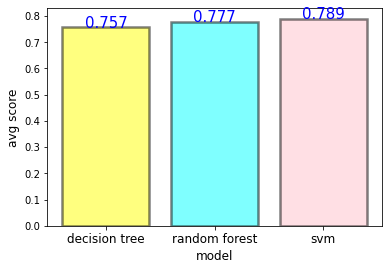

In [82]:
plt.bar(np.arange(len(acc_total)), 
        acc_total,color = ['yellow', 'cyan', 'pink'], alpha = 0.5,
        edgecolor = 'black', linewidth = 2.5)
plt.xticks(np.arange(len(acc_total)), model_list, fontsize=12)
plt.xlabel('model', fontsize=12)
plt.ylabel('avg score', fontsize=12)
add_value_label(model_list, np.round(acc_total, 3))
plt.show()

## 최종

In [2]:
optimum_df = pd.read_csv('C:/Users/user/Desktop/프로젝트 data/최적입지_변수_총합_가중치(상관)_최종.csv', encoding='euckr')
optimum_df.head(2)

,id,bus,metro,park,high,uni,age,pop,mart,Class
0,28208,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0
1,28207,0.0,0.0,0.0,0.0,0.0,0.008674,-0.002736,0.0,0


In [3]:
# train_test data split
data = ['bus', 'metro', 'park', 'high', 
        'uni', 'age', 'pop', 'mart']
X_train, X_test, y_train, y_test = train_test_split(
    optimum_df[data], # 문제
    optimum_df['Class'], # 정답
    test_size = 0.2, # test-size비율
    random_state = 42 # 시드값 설정
)

In [4]:
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
svc_clf = SVC()
clf_list = [df_clf, rf_clf, svc_clf]

## 정밀도 재현율 f1스코어 추가

In [5]:
def exec_kfold(df, clf, k):
    acc_list = []
    kfold = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kfold.split(df[data])):
        X_train2,X_test2 = df[data].values[train_index], df[data].values[test_index]
        y_train2,y_test2 = df['Class'].values[train_index],df['Class'].values[test_index]
        
        clf.fit(X_train2, y_train2)
        pred2 = clf.predict(X_test2)
        acc = accuracy_score(y_test2, pred2)
        acc_list.append(acc)
        precision = precision_score(y_test2, pred2)
        recall = recall_score(y_test2, pred2)
        f1 = f1_score(y_test2, pred2)
        print(i , ': 교차검증 정확도>> {0:.2f}, 교차검증 정밀도>> {0:.2f}, 교차검증 재현율>> {0:.2f}, f1score>> {0:.2f}'.format(acc, precision, recall, f1))
    print('평균 정확도>> {0:.2f}'.format(np.mean(acc_list)))
    return np.mean(acc_list)

In [7]:
acc_total = []
model_list = ['decision tree', 'random forest', 'svm']
for i, clf in enumerate(clf_list):
    print(model_list[i], '----검증시작----')
    acc_result = exec_kfold(optimum_df, clf, 10)
    acc_total.append(acc_result)

decision tree ----검증시작----
0 : 교차검증 정확도>> 0.66, 교차검증 정밀도>> 0.66, 교차검증 재현율>> 0.66, f1score>> 0.66
1 : 교차검증 정확도>> 0.77, 교차검증 정밀도>> 0.77, 교차검증 재현율>> 0.77, f1score>> 0.77
2 : 교차검증 정확도>> 0.69, 교차검증 정밀도>> 0.69, 교차검증 재현율>> 0.69, f1score>> 0.69
3 : 교차검증 정확도>> 0.62, 교차검증 정밀도>> 0.62, 교차검증 재현율>> 0.62, f1score>> 0.62
4 : 교차검증 정확도>> 0.71, 교차검증 정밀도>> 0.71, 교차검증 재현율>> 0.71, f1score>> 0.71
5 : 교차검증 정확도>> 0.77, 교차검증 정밀도>> 0.77, 교차검증 재현율>> 0.77, f1score>> 0.77
6 : 교차검증 정확도>> 0.76, 교차검증 정밀도>> 0.76, 교차검증 재현율>> 0.76, f1score>> 0.76
7 : 교차검증 정확도>> 0.70, 교차검증 정밀도>> 0.70, 교차검증 재현율>> 0.70, f1score>> 0.70
8 : 교차검증 정확도>> 0.67, 교차검증 정밀도>> 0.67, 교차검증 재현율>> 0.67, f1score>> 0.67
9 : 교차검증 정확도>> 0.74, 교차검증 정밀도>> 0.74, 교차검증 재현율>> 0.74, f1score>> 0.74
평균 정확도>> 0.71
random forest ----검증시작----
0 : 교차검증 정확도>> 0.67, 교차검증 정밀도>> 0.67, 교차검증 재현율>> 0.67, f1score>> 0.67
1 : 교차검증 정확도>> 0.78, 교차검증 정밀도>> 0.78, 교차검증 재현율>> 0.78, f1score>> 0.78
2 : 교차검증 정확도>> 0.70, 교차검증 정밀도>> 0.70, 교차검증 재현율>> 0.70, f1score>> 0.70
3 : 교차검증 정확도>> 0.61, 교

In [8]:
for i in range(3):
    print(model_list[i], " 교차검증 평균: ", acc_total[i])

decision tree  교차검증 평균:  0.7092547748199471
random forest  교차검증 평균:  0.7197805829415366
svm  교차검증 평균:  0.7470836643527864


In [9]:
# 최대 평균값 ==
max_value = np.max(acc_total)
# 최대 평균값 인덱스 ==
max_index = np.argmax(acc_total)
# 최대 평균값 모델명 ==
max_model = model_list[max_index]

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model)

최고 교차 검증 평균>>  0.7470836643527864
최고 교차 검증 인덱스>>  2
최고 교차 검증 모델링>>  svm


In [10]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], 
                 fontsize=15,
                 color="blue",
                 ha="center")

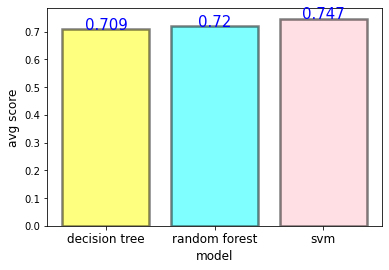

In [11]:
plt.bar(np.arange(len(acc_total)), 
        acc_total,color = ['yellow', 'cyan', 'pink'], alpha = 0.5,
        edgecolor = 'black', linewidth = 2.5)
plt.xticks(np.arange(len(acc_total)), model_list, fontsize=12)
plt.xlabel('model', fontsize=12)
plt.ylabel('avg score', fontsize=12)
add_value_label(model_list, np.round(acc_total, 3))
plt.show()